<a href="https://colab.research.google.com/github/yewcheng/Stock-Price-Prediction/blob/main/DAC_AAPL_Stock_Price_Prediction%20(Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install the dependencies
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')



In [6]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving AAPL_stockprediction.csv to AAPL_stockprediction.csv


In [7]:
# Store the data into a data frame
df = pd.read_csv('AAPL_stockprediction.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,138.210007,143.070007,137.690002,142.449997,141.997269,114311700
1,2022-10-04,145.029999,146.220001,144.259995,146.100006,145.635681,87830100
2,2022-10-05,144.070007,147.380005,143.009995,146.399994,145.934708,79471000
3,2022-10-06,145.809998,147.539993,145.220001,145.429993,144.967804,68402200
4,2022-10-07,142.539993,143.100006,139.449997,140.089996,139.644775,85925600


In [8]:
# Get the number of trading days
df.shape

(100, 7)

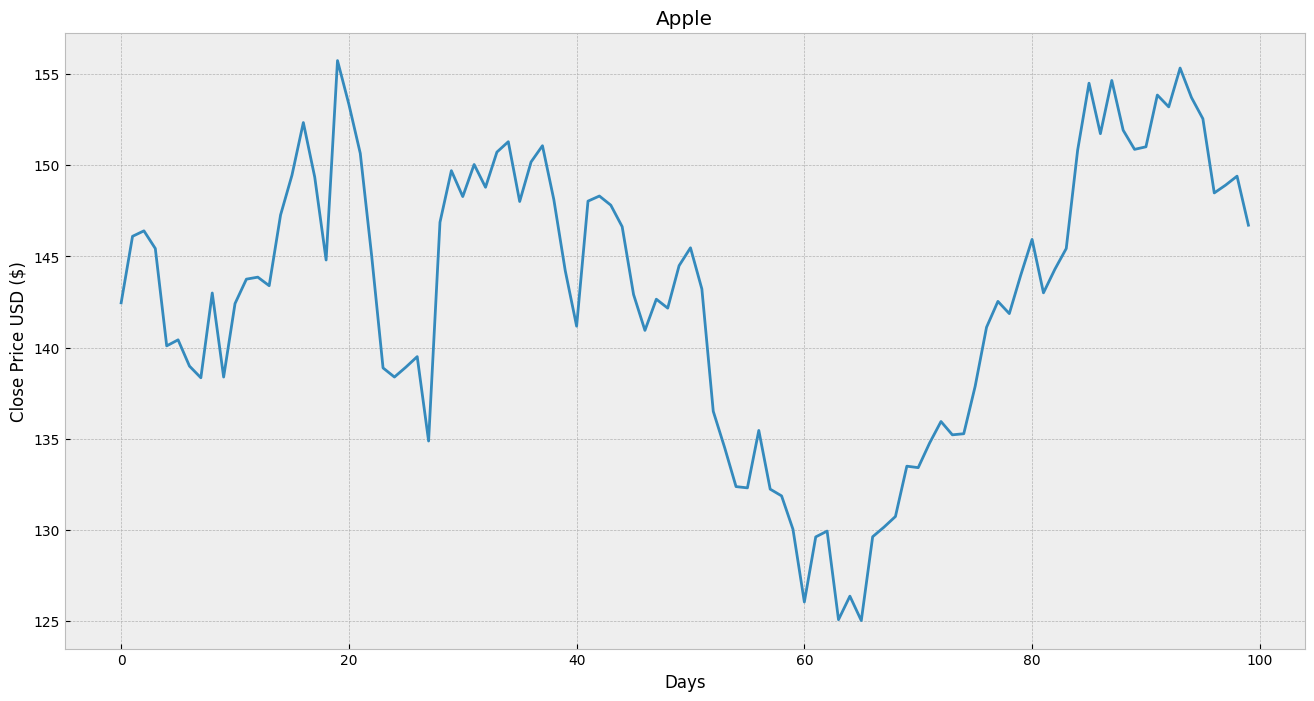

In [9]:
#visualise the close price data
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()


In [10]:
# Get the Close price
df = df[['Close']]
df.head(4)


,Close
0,142.449997
1,146.100006
2,146.399994
3,145.429993


In [11]:
# Create a variable to predict 'x' days out into the future
future_days = 25
# Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,142.449997,138.919998
1,146.100006,139.500000
2,146.399994,134.869995
3,145.429993,146.869995


In [12]:
# Create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1)) [:-future_days]
print(X)

[[142.449997]
 [146.100006]
 [146.399994]
 [145.429993]
 [140.089996]
 [140.419998]
 [138.979996]
 [138.339996]
 [142.990005]
 [138.380005]
 [142.410004]
 [143.75    ]
 [143.860001]
 [143.389999]
 [147.270004]
 [149.449997]
 [152.339996]
 [149.350006]
 [144.800003]
 [155.740005]
 [153.339996]
 [150.649994]
 [145.029999]
 [138.880005]
 [138.380005]
 [138.919998]
 [139.5     ]
 [134.869995]
 [146.869995]
 [149.699997]
 [148.279999]
 [150.039993]
 [148.789993]
 [150.720001]
 [151.289993]
 [148.009995]
 [150.179993]
 [151.070007]
 [148.110001]
 [144.220001]
 [141.169998]
 [148.029999]
 [148.309998]
 [147.809998]
 [146.630005]
 [142.910004]
 [140.940002]
 [142.649994]
 [142.160004]
 [144.490005]
 [145.470001]
 [143.210007]
 [136.5     ]
 [134.509995]
 [132.369995]
 [132.300003]
 [135.449997]
 [132.229996]
 [131.860001]
 [130.029999]
 [126.040001]
 [129.610001]
 [129.929993]
 [125.07    ]
 [126.360001]
 [125.019997]
 [129.619995]
 [130.149994]
 [130.729996]
 [133.490005]
 [133.410004]
 [134.

<ipython-input-12-47414a5f82be>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1)) [:-future_days]


In [13]:
# Create the target data set (y) and convert it to a numpy array and get all the target values except the last 'x' rows/days
y = np.array(df['Prediction']) [:-future_days]
print(y)


[138.919998 139.5      134.869995 146.869995 149.699997 148.279999
 150.039993 148.789993 150.720001 151.289993 148.009995 150.179993
 151.070007 148.110001 144.220001 141.169998 148.029999 148.309998
 147.809998 146.630005 142.910004 140.940002 142.649994 142.160004
 144.490005 145.470001 143.210007 136.5      134.509995 132.369995
 132.300003 135.449997 132.229996 131.860001 130.029999 126.040001
 129.610001 129.929993 125.07     126.360001 125.019997 129.619995
 130.149994 130.729996 133.490005 133.410004 134.759995 135.940002
 135.210007 135.270004 137.869995 141.110001 142.529999 141.860001
 143.960007 145.929993 143.       144.289993 145.429993 150.820007
 154.5      151.729996 154.649994 151.919998 150.869995 151.009995
 153.850006 153.199997 155.330002 153.710007 152.550003 148.479996
 148.910004 149.399994 146.710007]


In [14]:
# Split data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [15]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train,y_train)
# Create the linear regression model
lr = LinearRegression().fit(x_train,y_train)

In [16]:
# Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

<ipython-input-16-dadad65cbff3>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'],1)[:-future_days]


array([[145.470001],
       [143.210007],
       [136.5     ],
       [134.509995],
       [132.369995],
       [132.300003],
       [135.449997],
       [132.229996],
       [131.860001],
       [130.029999],
       [126.040001],
       [129.610001],
       [129.929993],
       [125.07    ],
       [126.360001],
       [125.019997],
       [129.619995],
       [130.149994],
       [130.729996],
       [133.490005],
       [133.410004],
       [134.759995],
       [135.940002],
       [135.210007],
       [135.270004]])

In [17]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
# Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)


[146.869995 141.110001 142.529999 136.5      143.960007 145.929993
 143.       144.289993 145.429993 150.820007 154.5      151.729996
 154.649994 151.919998 150.869995 151.919998 151.729996 153.199997
 153.199997 153.710007 153.710007 136.5      148.910004 149.399994
 149.399994]

[139.68282395 141.06889537 145.18419344 146.40467857 147.71715676
 147.76008338 145.82816823 147.80301921 148.02993994 149.15229401
 151.59938998 149.40988196 149.21362845 152.19429893 151.40313156
 152.22496615 149.40375257 149.07870017 148.72298056 147.03024615
 147.07931137 146.25135167 145.52764445 145.97535591 145.9385593 ]


<ipython-input-18-efd87df4409a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


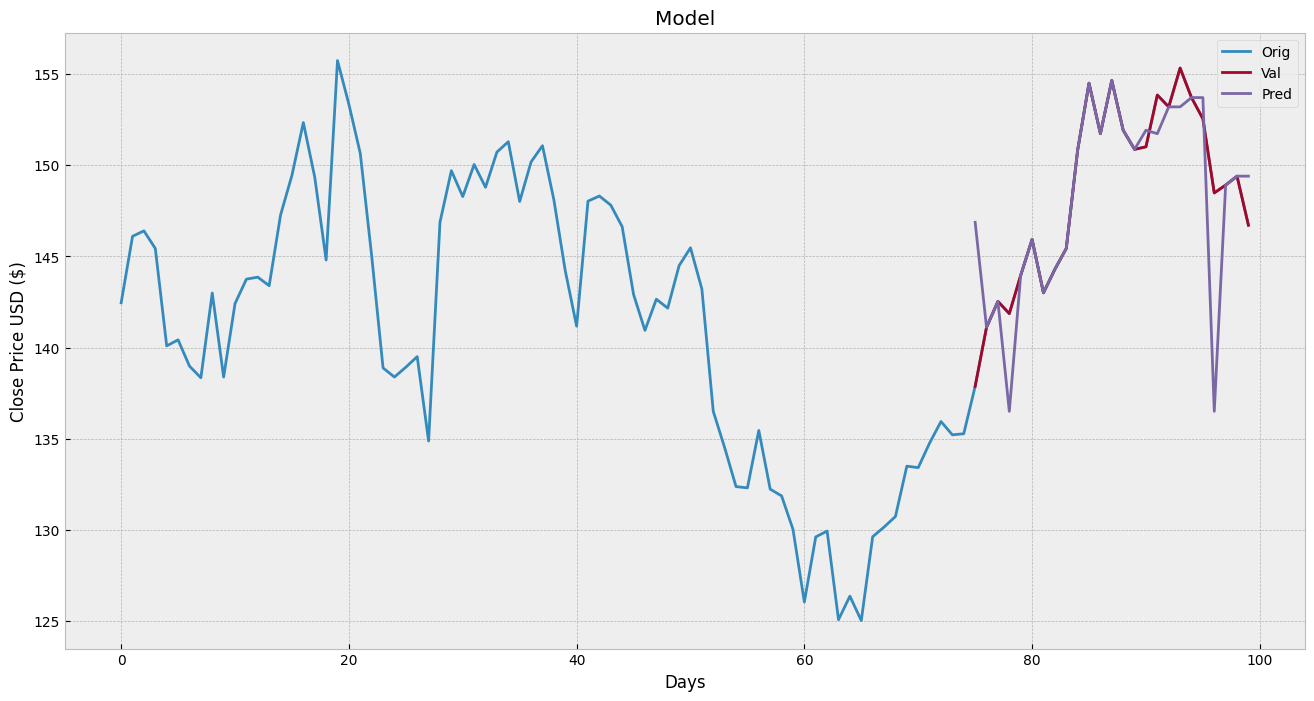

In [18]:
# Visualise the Data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

<ipython-input-19-dd7327c113ce>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']= predictions


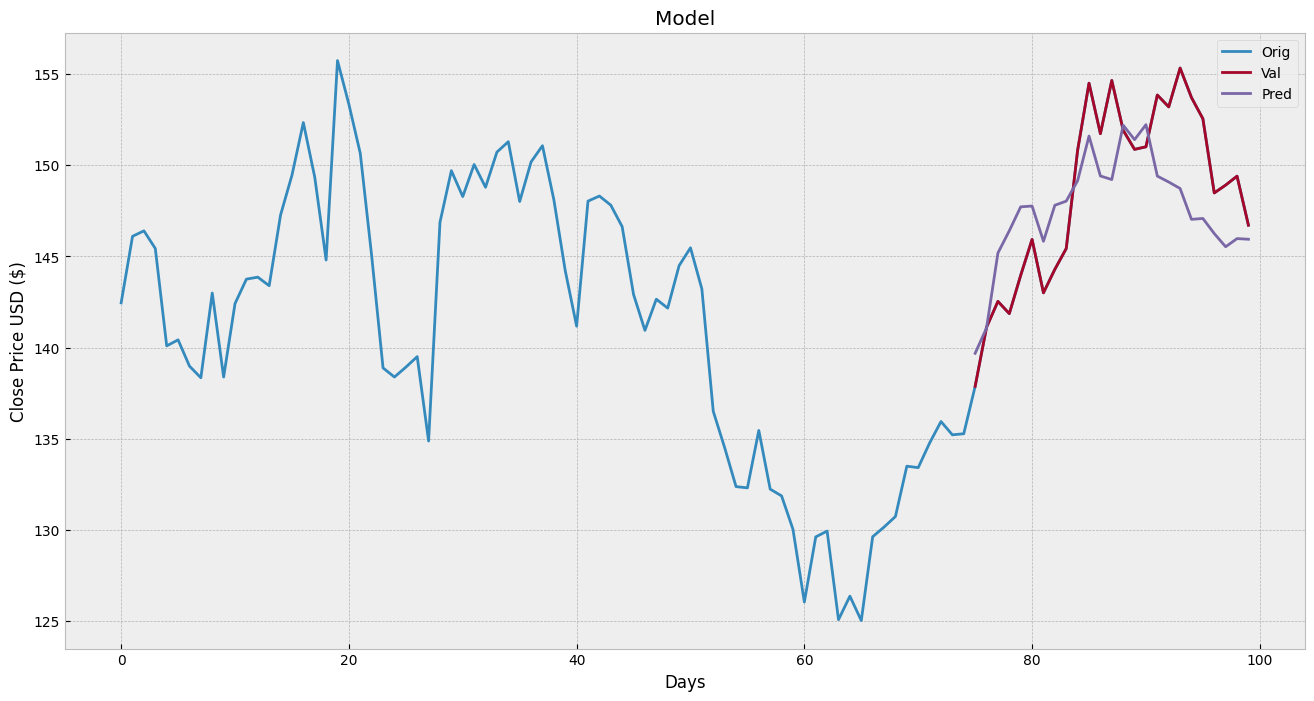

In [19]:
# Visualise the Data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()

In [24]:
# Python program for calculating Mean Absolute
# Error using sklearn for linear Regression Method

# import the module
from sklearn.metrics import mean_absolute_error as mae

# list of integers of actual and calculated
actual = x_future = np.array(x_future)
prediction = np.array(lr_prediction)

# calculate MAE
error = mae(actual, prediction)

# display
print("Mean absolute error : " + str(error))



Mean absolute error : 15.640041615584023


In [23]:
# Using the mean_absolute_percentage_error function for Linear Regression
from sklearn.metrics import mean_absolute_percentage_error

error1 = mean_absolute_percentage_error(actual, prediction)
print("Mean absolute percentage error : " + str(error1))

Mean absolute percentage error : 0.11976731917797499
